## Całkowanie numeryczne podstawy 

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów,
* wzór trapezów
* wzór Simpsona

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import scipy.integrate as integrate


def rectangle_rule(fun, a, b, n):
    total = 0.0
    dx = float(b - a)/n
    for k in range(0, n):
        total += fun(a + k*dx)
    return dx*total


def trapezoidal_rule(fun, a, b, n):
    total = 0.0
    dx = float(b - a)/n
    total += fun(a)/2.0
    for i in range(1, n):
        total += fun(a + i*dx)
    total += fun(b)/2.0
    return dx * total


def simpson_rule(fun, a, b, n):
    total = 0.0
    dx = float(b - a)/n
    x = a + dx
    for i in range(1, int(n/2 + 1)):
        total += 4*fun(x)
        x += 2*dx

    x = a + 2*dx
    for i in range(1, int(n/2)):
        total += 2*fun(x)
        x += 2*dx
    return (dx/3)*(fun(a) + fun(b) + total)

#### Zadanie 2"
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)

In [61]:
def to_chart(fun, a, b, n, func_name):
    x_axis = np.linspace(a, b, n)
    plt.plot(x_axis, np.vectorize(fun)(x_axis), label=func_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(func_name)
    plt.show()


def calc_integral(fun, a, b, n, func_name):
    to_chart(fun, a, b, n, func_name)
    rect = rectangle_rule(fun, a, b, n)
    trap = trapezoidal_rule(fun, a, b, n)
    simp = simpson_rule(fun, a, b, n)
    base_val = integrate.quad(fun, a, b)[0]  # used as a reference value of an integral
    if base_val == 0:
        rect_rel_err = "Undefined"
        trap_rel_err = "Undefined"
        simp_rel_err = "Undefined"
    else:
        rect_rel_err = (abs(rect - base_val) / base_val)*100
        trap_rel_err = (abs(trap - base_val) / base_val)*100
        simp_rel_err = (abs(simp - base_val) / base_val)*100

    table = [["Quad integral (SciPy)", base_val, 0, 0],
             ["Rectangular rule", rect, rect_rel_err, abs(rect - base_val)],
             ["Trapezoidal rule", trap, trap_rel_err, abs(trap - base_val)],
             ["Simpson's rule", simp, simp_rel_err, abs(simp - base_val)]]
    print(tabulate(table, headers=["Integration method", "Value of the definite integral", "Relative error [%]",
                                   "Absolute error"], tablefmt="grid", floatfmt=".10f"))


def integral_comparison(a, b, n):
    calc_integral(lambda x: x, a, b, n, "x")
    calc_integral(lambda x: 2*x**2, a, b, n, "2*x^2")
    calc_integral(lambda x: 4*np.sin(x), a, b, n, "4*sin(x)")
    calc_integral(lambda x: np.exp(x), a, b, n, "e^x")
    calc_integral(lambda x: x*np.sin(x) ** 2 + 2*np.cos(x), a, b, n, "x*sin^2(x) + 2*cos(x)")
    calc_integral(lambda x: np.cos((x + 1) / (x**2 + 0.04)) * np.exp(x), a, b, n, "cos((x+1)/(x^2 + 0.04))*e^x")

## Przedział [-2, 3], 5 kroków

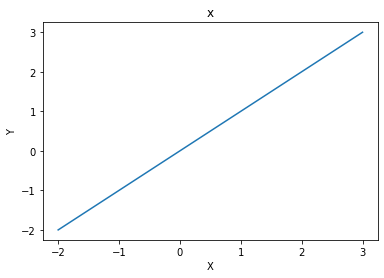

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.0000000000 |       100.0000000000 |     2.5000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     0.3333333333 |        86.66

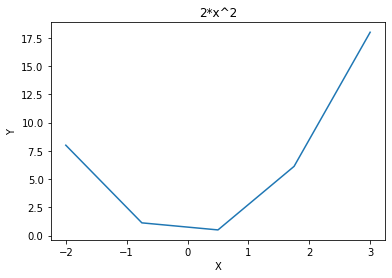

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    23.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    20.0000000000 |        14.2857142857 |     3.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    25.0000000000 |         7.1428571429 |     1.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    14.0000000000 |        40.00

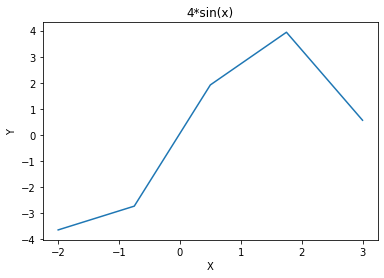

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.2953826402 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.0000000000 |       100.0000000000 |     2.2953826402 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.1008348698 |         8.4756139144 |     0.1945477704 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    -1.0242365584 |       144.62

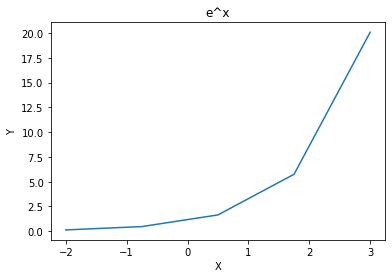

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    19.9502016400 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    11.6105526518 |        41.8023293131 |     8.3396489882 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    21.5856534718 |         8.1976706869 |     1.6354518318 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    11.5218390950 |        42.24

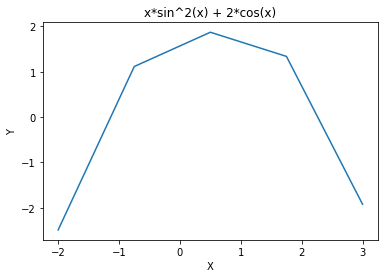

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.9802685073 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.4966218773 |        16.2282904662 |     0.4836466300 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.7794703127 |         6.7375873737 |     0.2007981947 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.7462197256 |         7.85

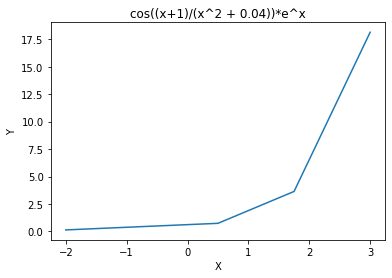

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    12.7547872935 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     5.9961205467 |        52.9892548679 |     6.7586667468 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    15.0060994850 |        17.6507231335 |     2.2513121914 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     5.9948822214 |        52.99

In [62]:
integral_comparison(-2, 3, 5)

## Przedział [-2, 3], 10 kroków

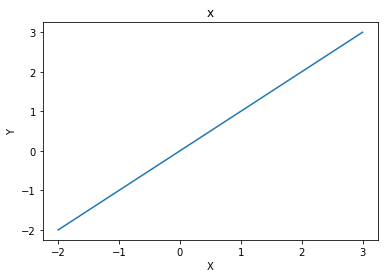

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     1.2500000000 |        50.0000000000 |     1.2500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.5000000000 |         0.00

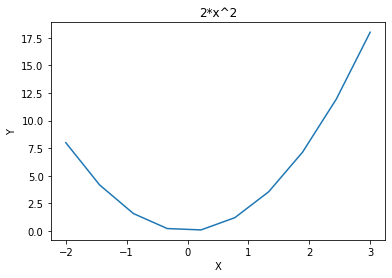

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    23.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    21.2500000000 |         8.9285714286 |     2.0833333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    23.7500000000 |         1.7857142857 |     0.4166666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    23.3333333333 |         0.00

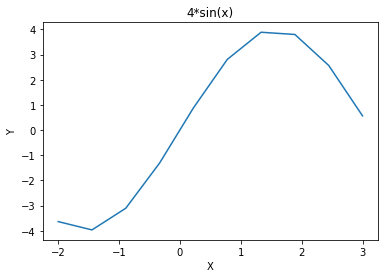

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.2953826402 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     1.1969442882 |        47.8542589267 |     1.0984383520 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.2473617231 |         2.0920658839 |     0.0480209171 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.2962040075 |         0.03

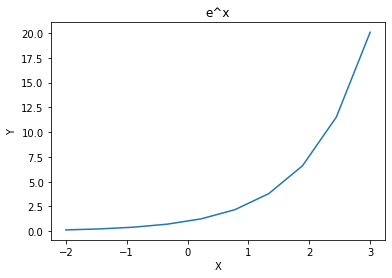

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    19.9502016400 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    15.3765588867 |        22.9252958732 |     4.5736427533 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    20.3641092967 |         2.0747041268 |     0.4139076567 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    19.9569279050 |         0.03

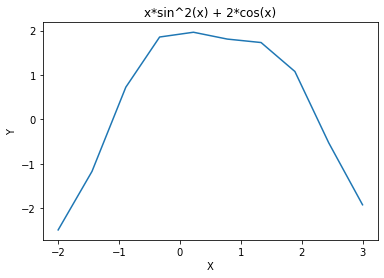

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.9802685073 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.7915179843 |         6.3333395151 |     0.1887505230 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.9329422020 |         1.5879879688 |     0.0473263053 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.9840994984 |         0.12

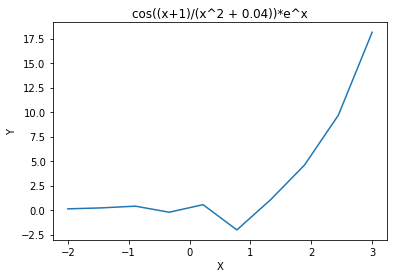

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    12.7547872935 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     9.6319497779 |        24.4836502852 |     3.1228375156 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    14.1369392471 |        10.8363387155 |     1.3821519536 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    13.8472191678 |         8.56

In [63]:
integral_comparison(-2, 3, 10)

## Przedział [-2, 3], 50 kroków

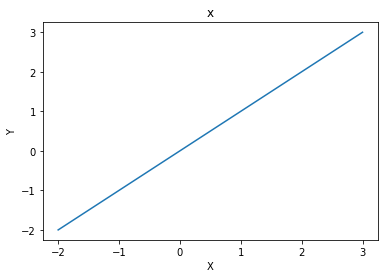

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.2500000000 |        10.0000000000 |     0.2500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.5000000000 |         0.00

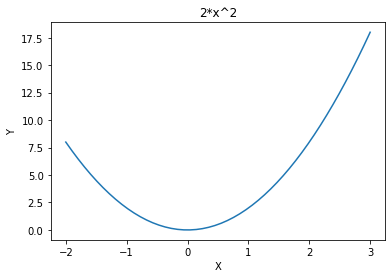

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    23.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    22.8500000000 |         2.0714285714 |     0.4833333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    23.3500000000 |         0.0714285714 |     0.0166666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    23.3333333333 |         0.00

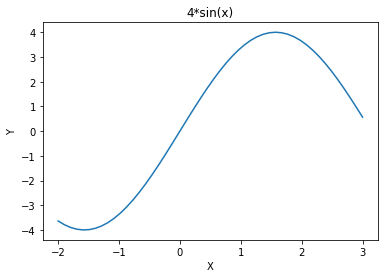

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.2953826402 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.0833860155 |         9.2357858341 |     0.2119966247 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.2934695025 |         0.0833472255 |     0.0019131377 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.2953839169 |         0.00

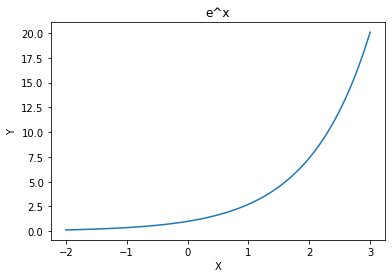

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    19.9502016400 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    18.9693139558 |         4.9166805522 |     0.9808876842 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    19.9668240378 |         0.0833194478 |     0.0166223978 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    19.9502127102 |         0.00

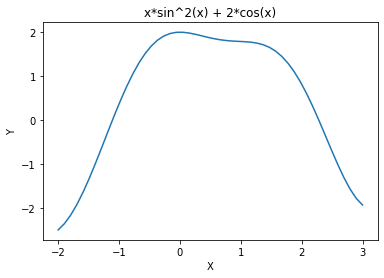

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.9802685073 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.9501220811 |         1.0115338998 |     0.0301464263 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.9784069246 |         0.0624635905 |     0.0018615827 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.9802735902 |         0.00

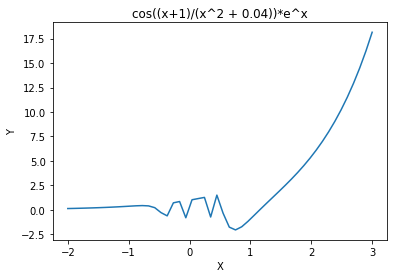

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    12.7547872935 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    11.6777884328 |         8.4438794310 |     1.0769988607 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    12.5787863266 |         1.3798816308 |     0.1760009669 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    12.5548382716 |         1.56

In [64]:
integral_comparison(-2, 3, 50)

## Przedział [-2, 3], 1000 kroków

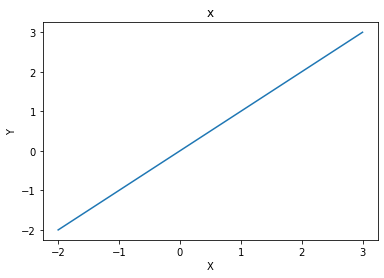

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.4875000000 |         0.5000000000 |     0.0125000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.5000000000 |         0.00

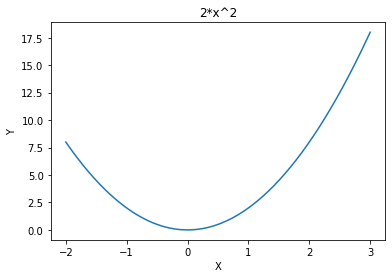

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    23.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    23.3083750000 |         0.1069642857 |     0.0249583333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    23.3333750000 |         0.0001785714 |     0.0000416667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    23.3333333333 |         0.00

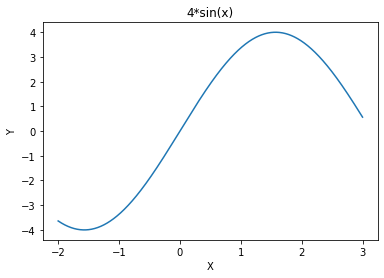

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.2953826402 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.2848736838 |         0.4578302638 |     0.0105089564 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.2953778582 |         0.0002083334 |     0.0000047820 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.2953826402 |         0.00

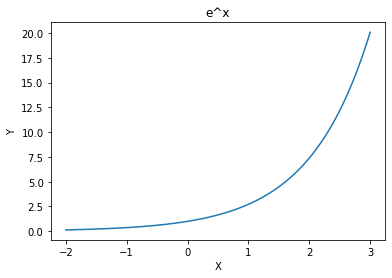

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    19.9502016400 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    19.9003676988 |         0.2497916668 |     0.0498339412 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    19.9502432029 |         0.0002083332 |     0.0000415629 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    19.9502016400 |         0.00

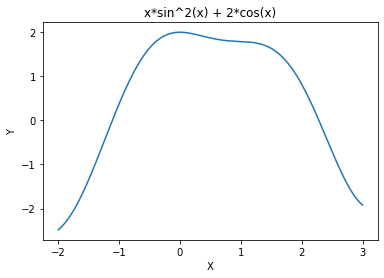

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     2.9802685073 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.9788496143 |         0.0476095687 |     0.0014188930 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     2.9802638565 |         0.0001560533 |     0.0000046508 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     2.9802685074 |         0.00

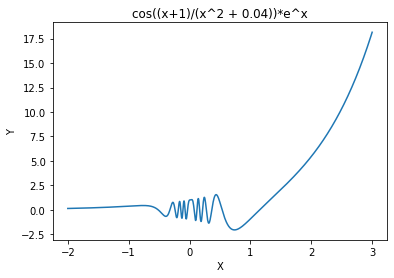

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    12.7547872935 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    12.7097782201 |         0.3528798430 |     0.0450090734 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    12.7548281148 |         0.0003200470 |     0.0000408213 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    12.7547872936 |         0.00

In [65]:
integral_comparison(-2, 3, 1000)

## Przedział [0, 10], 5 kroków

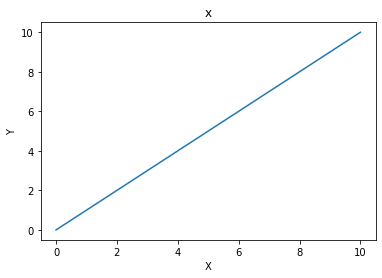

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    40.0000000000 |        20.0000000000 |    10.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    33.3333333333 |        33.33

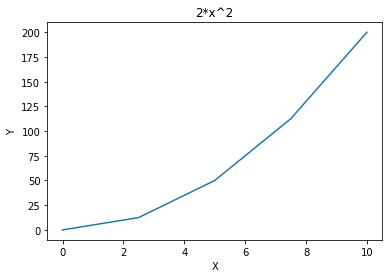

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   480.0000000000 |        28.0000000000 |   186.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   680.0000000000 |         2.0000000000 |    13.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   389.3333333333 |        41.60

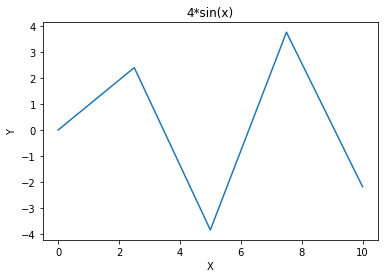

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     7.3562861163 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     6.8995014395 |         6.2094468533 |     0.4567846768 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     4.7234169960 |        35.7907384066 |     2.6328691203 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     1.2317376347 |        83.25

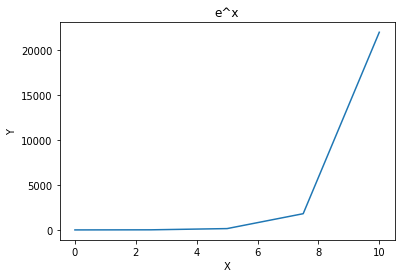

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 22025.4657948067 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  6894.7479733331 |        68.6964714501 | 15130.7178214736 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 28920.2137681398 |        31.3035285499 |  6894.7479733331 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 15853.2889954931 |        28.02

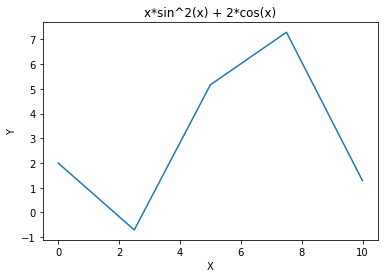

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    21.7035843937 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    27.4669586489 |        26.5549420347 |     5.7633742552 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    26.7484052817 |        23.2441830643 |     5.0448208880 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    12.0595912427 |        44.43

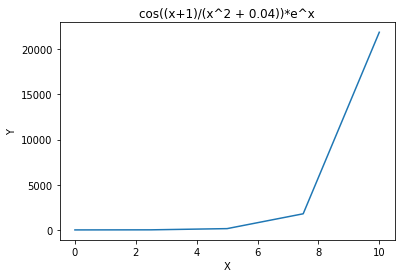

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 21839.8276450928 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  6811.6266584631 |        68.8109871142 | 15028.2009866297 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 28704.0817783493 |        31.4299830786 |  6864.2541332565 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 15735.6790368126 |        27.94

In [66]:
integral_comparison(0, 10, 5)

## Przedział [0, 10], 10 kroków

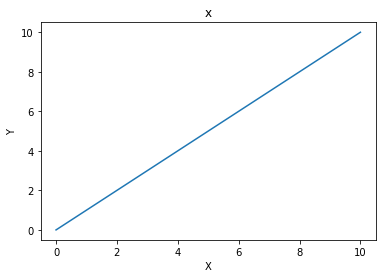

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    45.0000000000 |        10.0000000000 |     5.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    50.0000000000 |         0.00

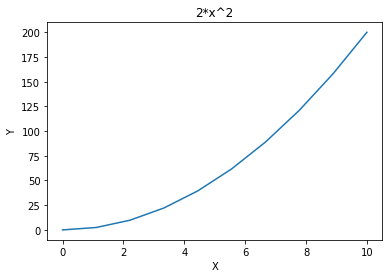

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   570.0000000000 |        14.5000000000 |    96.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   670.0000000000 |         0.5000000000 |     3.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

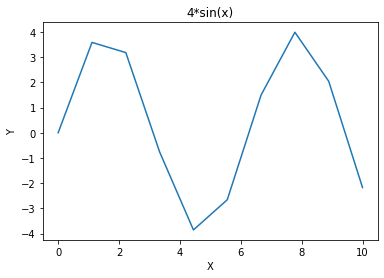

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     7.3562861163 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     7.8208379284 |         6.3150318623 |     0.4645518121 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     6.7327957067 |         8.4756139144 |     0.6234904097 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     7.4025886102 |         0.62

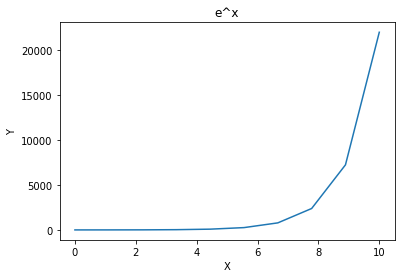

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 22025.4657948067 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 12818.3080505246 |        41.8023293131 |  9207.1577442821 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 23831.0409479280 |         8.1976706869 |  1805.5751531212 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 22134.6500078573 |         0.49

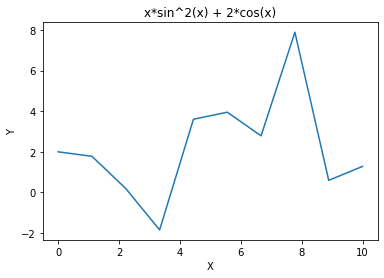

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    21.7035843937 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    23.0024586590 |         5.9846071586 |     1.2988742653 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    22.6431819754 |         4.3292276734 |     0.9395975817 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    21.2747742066 |         1.97

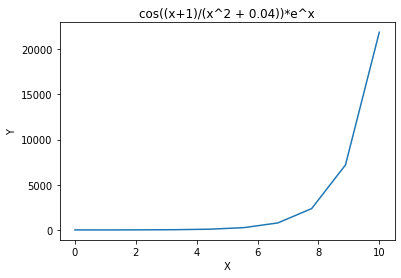

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 21839.8276450928 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 12690.7442865144 |        41.8917379169 |  9149.0833585784 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 23636.9718464575 |         8.2287471796 |  1797.1442013647 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 21947.9352024935 |         0.49

In [67]:
integral_comparison(0, 10, 10)

## Przedział [0, 10], 50 kroków

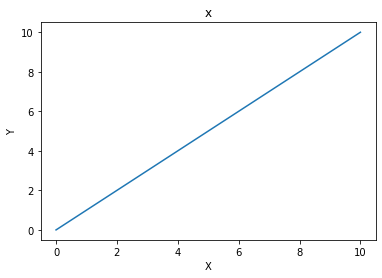

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    49.0000000000 |         2.0000000000 |     1.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    50.0000000000 |         0.00

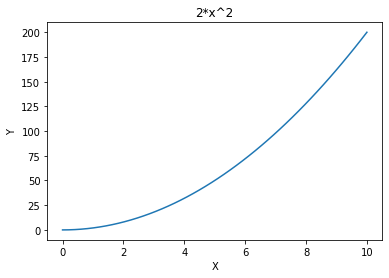

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   646.8000000000 |         2.9800000000 |    19.8666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   666.8000000000 |         0.0200000000 |     0.1333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

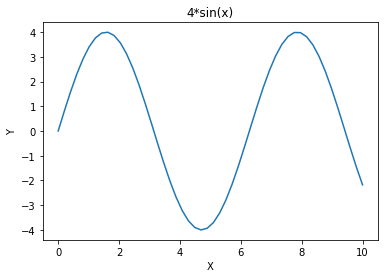

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     7.3562861163 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     7.5493572441 |         2.6245733879 |     0.1930711277 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     7.3317487997 |         0.3335557674 |     0.0245373166 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     7.3563518182 |         0.00

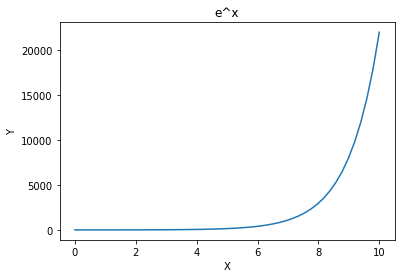

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 22025.4657948067 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 19896.2885357307 |         9.6668886775 |  2129.1772590760 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 22098.8351152114 |         0.3331113225 |    73.3693204047 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 22025.6606483298 |         0.00

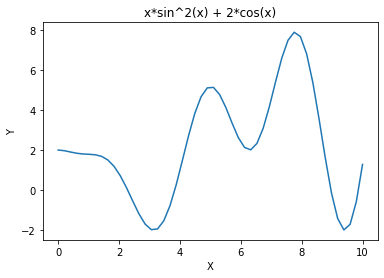

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    21.7035843937 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    21.8105763999 |         0.4929692917 |     0.1069920063 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    21.7387210632 |         0.1618933947 |     0.0351366695 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    21.7032111895 |         0.00

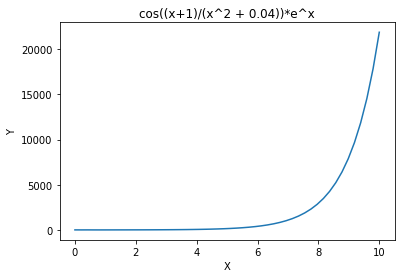

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 21839.8276450928 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 19723.5538280750 |         9.6899749000 |  2116.2738170178 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 21912.7993400637 |         0.3341221193 |    72.9716949709 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 21839.7970720098 |         0.00

In [68]:
integral_comparison(0, 10, 50)

## Przedział [0, 10], 1000 kroków

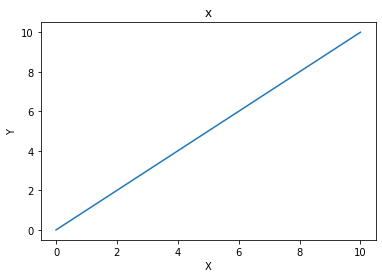

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    49.9500000000 |         0.1000000000 |     0.0500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    50.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    50.0000000000 |         0.00

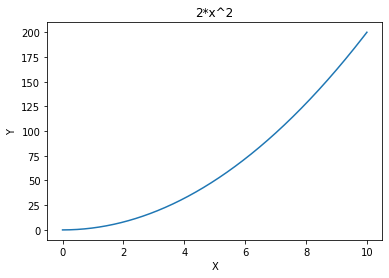

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   665.6670000000 |         0.1499500000 |     0.9996666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   666.6670000000 |         0.0000500000 |     0.0003333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

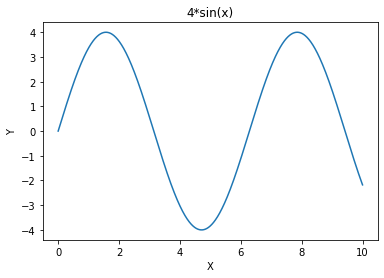

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     7.3562861163 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     7.3671052360 |         0.1470731230 |     0.0108191197 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     7.3562248138 |         0.0008333347 |     0.0000613025 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     7.3562861167 |         0.00

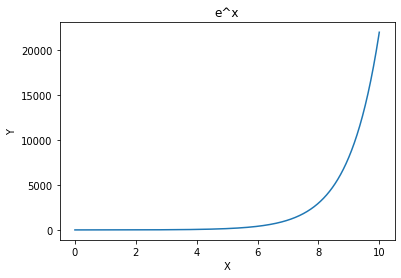

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 22025.4657948067 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 21915.5220110751 |         0.4991666681 |   109.9437837317 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 22025.6493400491 |         0.0008333319 |     0.1835452424 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 22025.4657960281 |         0.00

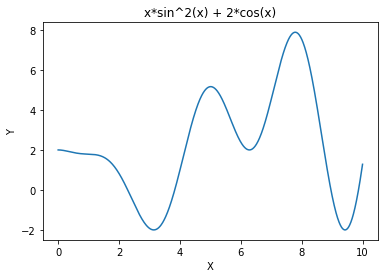

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    21.7035843937 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    21.7072647732 |         0.0169574733 |     0.0036803795 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    21.7036720064 |         0.0004036784 |     0.0000876127 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    21.7035843914 |         0.00

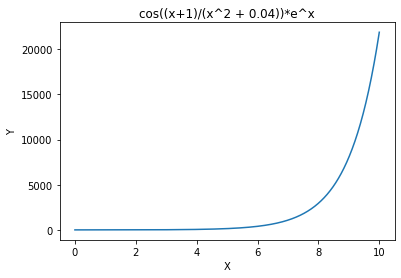

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 21839.8276450928 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 21730.5480214085 |         0.5003685261 |   109.2796236843 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 21840.0102970079 |         0.0008363249 |     0.1826519151 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 21839.8276411982 |         0.00

In [69]:
integral_comparison(0, 10, 1000)

## Przedział [-10, 15,], 5 kroków

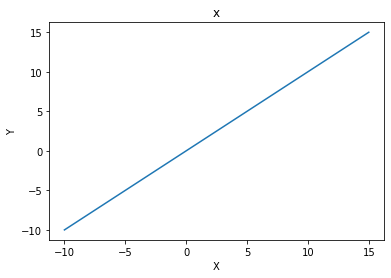

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.0000000000 |       100.0000000000 |    62.5000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     8.3333333333 |        86.66

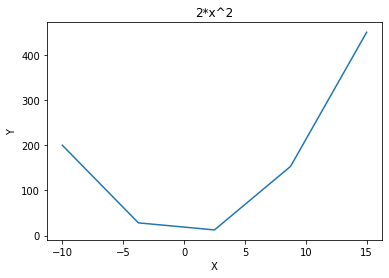

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  2916.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  2500.0000000000 |        14.2857142857 |   416.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  3125.0000000000 |         7.1428571429 |   208.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  1750.0000000000 |        40.00

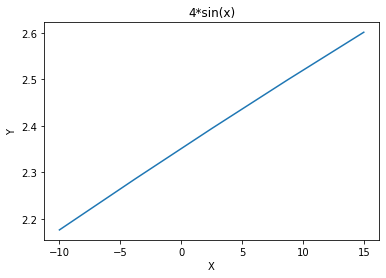

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    -0.3175344649 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    -0.0000000000 |      -100.0000000000 |     0.3175344649 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     1.0626672927 |      -434.6620320760 |     1.3802017575 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     7.9620596736 |     -2607.46

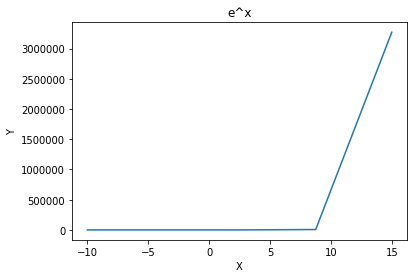

+-----------------------+----------------------------------+----------------------+--------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |     Absolute error |
+=======================+==================================+======================+====================+
| Quad integral (SciPy) |               3269017.3724267120 |         0.0000000000 |       0.0000000000 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Rectangular rule      |                110879.4286862811 |        96.6081725468 | 3158137.9437404308 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Trapezoidal rule      |               8283422.8597530583 |       153.3918274532 | 5014405.4873263463 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Simpson's rule        |               5449355.0868428

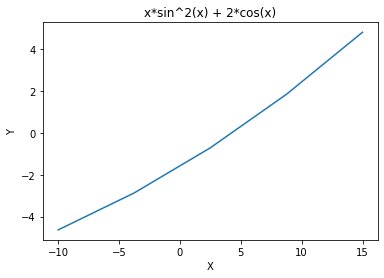

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    37.4817440022 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    -1.1081868723 |       102.9566043464 |    38.5899308745 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    22.5454907508 |        39.8494084228 |    14.9362532514 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    14.5410008641 |        61.20

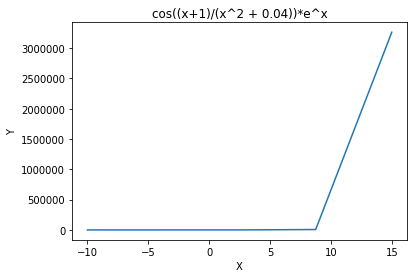

+-----------------------+----------------------------------+----------------------+--------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |     Absolute error |
+=======================+==================================+======================+====================+
| Quad integral (SciPy) |               3259218.5853965636 |         0.0000000000 |       0.0000000000 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Rectangular rule      |                110193.0853744115 |        96.6190335969 | 3149025.5000221520 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Trapezoidal rule      |               8262089.1429151865 |       153.4990804218 | 5002870.5575186228 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Simpson's rule        |               5435561.8725483

In [70]:
integral_comparison(-10, 15, 5)

## Przedział [-10, 15,], 10 kroków

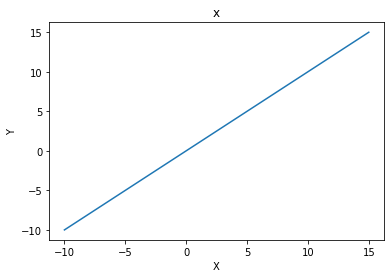

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    31.2500000000 |        50.0000000000 |    31.2500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    62.5000000000 |         0.00

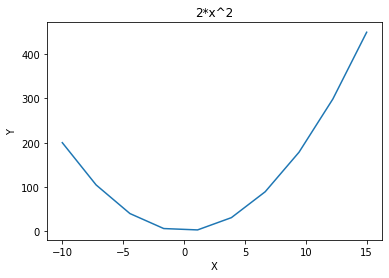

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  2916.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  2656.2500000000 |         8.9285714286 |   260.4166666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  2968.7500000000 |         1.7857142857 |    52.0833333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  2916.6666666667 |         0.00

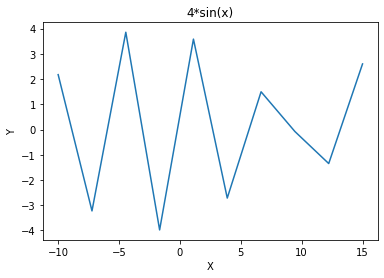

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    -0.3175344649 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    -0.6632189735 |      -108.8651931948 |     0.3456845086 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    -0.1318853272 |       -58.4658228432 |     0.1856491377 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    -0.5300695338 |       -66.93

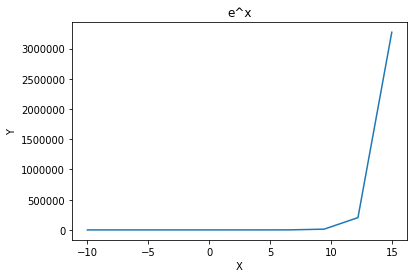

+-----------------------+----------------------------------+----------------------+--------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |     Absolute error |
+=======================+==================================+======================+====================+
| Quad integral (SciPy) |               3269017.3724267120 |         0.0000000000 |       0.0000000000 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Rectangular rule      |                730833.6995115761 |        77.6436275415 | 2538183.6729151360 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Trapezoidal rule      |               4817105.4150449652 |        47.3563724585 | 1548088.0426182533 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Simpson's rule        |               3661666.2668089

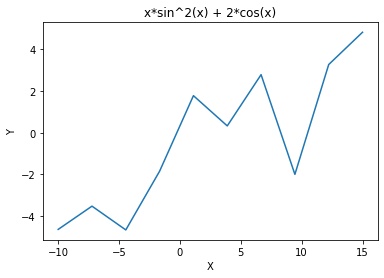

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    37.4817440022 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.0272710473 |        99.9272417866 |    37.4544729549 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    11.8541098588 |        68.3736438249 |    25.6276341434 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     8.2903162281 |        77.88

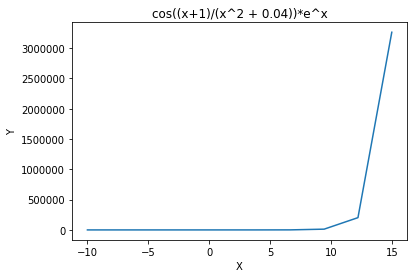

+-----------------------+----------------------------------+----------------------+--------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |     Absolute error |
+=======================+==================================+======================+====================+
| Quad integral (SciPy) |               3259218.5853965636 |         0.0000000000 |       0.0000000000 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Rectangular rule      |                727933.4195599541 |        77.6654004484 | 2531285.1658366094 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Trapezoidal rule      |               4803881.4483303409 |        47.3936565610 | 1544662.8629337773 |
+-----------------------+----------------------------------+----------------------+--------------------+
| Simpson's rule        |               3651145.5501353

In [71]:
integral_comparison(-10, 15, 10)

## Przedział [-10, 15,], 50 kroków

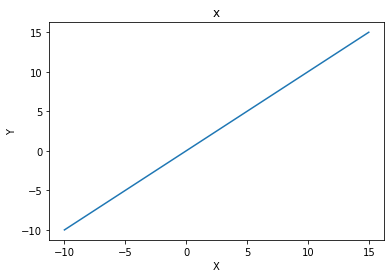

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    56.2500000000 |        10.0000000000 |     6.2500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    62.5000000000 |         0.00

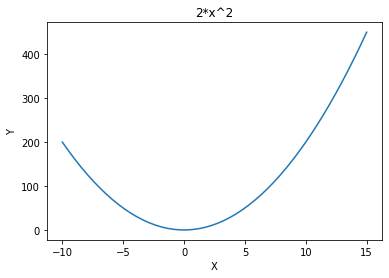

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  2916.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  2856.2500000000 |         2.0714285714 |    60.4166666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  2918.7500000000 |         0.0714285714 |     2.0833333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  2916.6666666667 |         0.00

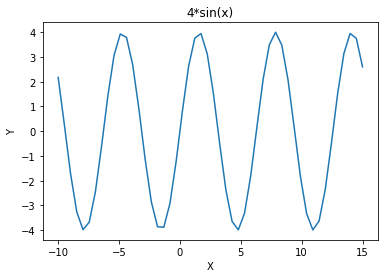

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    -0.3175344649 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    -0.4171581639 |       -31.3741373238 |     0.0996236991 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    -0.3108914347 |        -2.0920658839 |     0.0066430302 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    -0.3176480897 |        -0.03

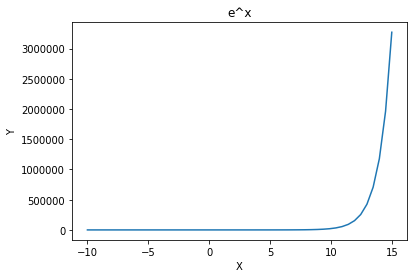

+-----------------------+----------------------------------+----------------------+-------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |    Absolute error |
+=======================+==================================+======================+===================+
| Quad integral (SciPy) |               3269017.3724267120 |         0.0000000000 |      0.0000000000 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Rectangular rule      |               2519585.4676528838 |        22.9252958732 | 749431.9047738281 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Trapezoidal rule      |               3336839.8107595616 |         2.0747041268 |  67822.4383328496 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Simpson's rule        |               3270119.5305737918 |    

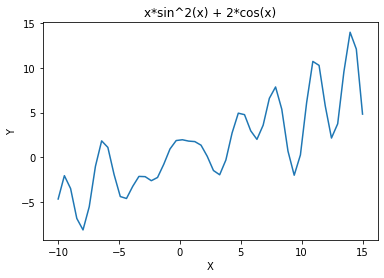

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    37.4817440022 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    34.6072357746 |         7.6690887900 |     2.8745082276 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    36.9726035369 |         1.3583691976 |     0.5091404653 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    37.5188554420 |         0.09

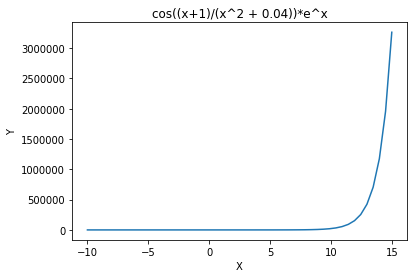

+-----------------------+----------------------------------+----------------------+-------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |    Absolute error |
+=======================+==================================+======================+===================+
| Quad integral (SciPy) |               3259218.5853965636 |         0.0000000000 |      0.0000000000 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Rectangular rule      |               2511705.1578196762 |        22.9353572947 | 747513.4275768874 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Trapezoidal rule      |               3326894.7635737536 |         2.0764541071 |  67676.1781771900 |
+-----------------------+----------------------------------+----------------------+-------------------+
| Simpson's rule        |               3260319.9892302128 |    

In [72]:
integral_comparison(-10, 15, 50)

## Przedział [-10, 15,], 1000 kroków

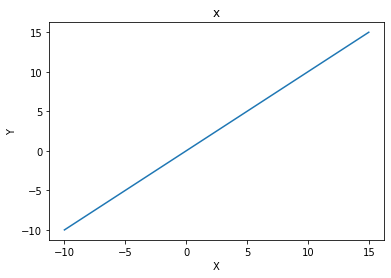

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    62.1875000000 |         0.5000000000 |     0.3125000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    62.5000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    62.5000000000 |         0.00

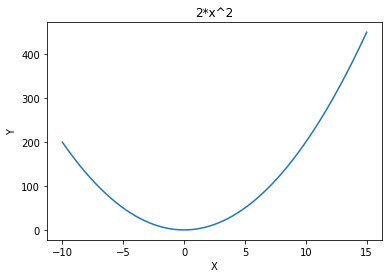

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  2916.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  2913.5468750000 |         0.1069642857 |     3.1197916667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  2916.6718750000 |         0.0001785714 |     0.0052083333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  2916.6666666667 |         0.00

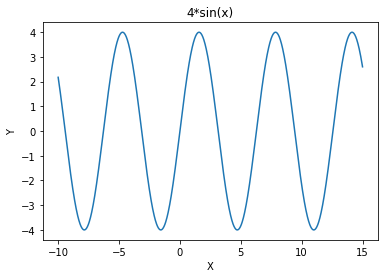

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    -0.3175344649 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    -0.3228312629 |        -1.6681017728 |     0.0052967980 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    -0.3175179264 |        -0.0052083876 |     0.0000165384 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    -0.3175344656 |        -0.00

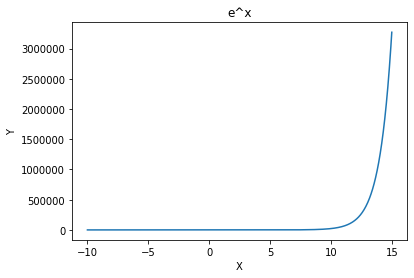

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |               3269017.3724267120 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |               3228324.9148193342 |         1.2447917209 | 40692.4576073778 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |               3269187.6319746678 |         0.0052082791 |   170.2595479558 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |               3269017.3795206435 |         0.00

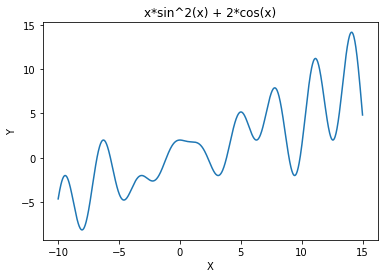

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                    37.4817440022 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                    37.3622237115 |         0.3188760125 |     0.1195202907 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    37.4804920996 |         0.0033400329 |     0.0012519026 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    37.4817442073 |         0.00

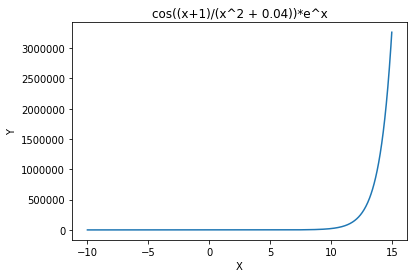

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |               3259218.5853965636 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |               3218628.9953985126 |         1.2453779621 | 40589.5899980511 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |               3259388.4756862167 |         0.0052126080 |   169.8902896531 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |               3259218.5903135547 |         0.00

In [73]:
integral_comparison(-10, 15, 1000)

## Przedział [0, 50], 5 kroków

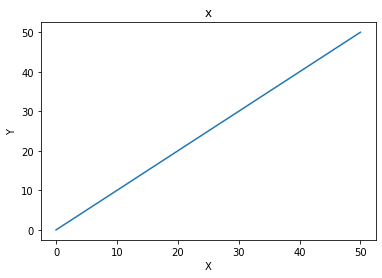

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  1000.0000000000 |        20.0000000000 |   250.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   833.3333333333 |        33.33

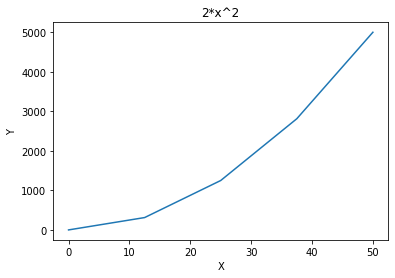

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 83333.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 60000.0000000000 |        28.0000000000 | 23333.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 85000.0000000000 |         2.0000000000 |  1666.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 48666.6666666667 |        41.60

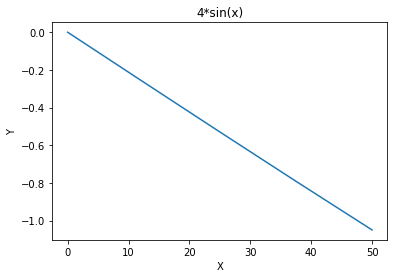

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     0.1401358860 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     5.0402270490 |      3496.6711965956 |     4.9000911630 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    -0.2072700251 |       247.9064577664 |     0.3474059111 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   -60.8626038957 |     43531.13

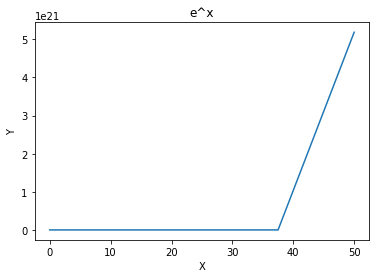

+-----------------------+------------------------------------+----------------------+------------------------------------+
| Integration method    |     Value of the definite integral |   Relative error [%] |                     Absolute error |
+=======================+====================================+======================+====================================+
| Quad integral (SciPy) |  5184705528587072045056.0000000000 |         0.0000000000 |                       0.0000000000 |
+-----------------------+------------------------------------+----------------------+------------------------------------+
| Rectangular rule      |     2353959537967887360.0000000000 |        99.9545980090 |  5182351569049104678912.0000000000 |
+-----------------------+------------------------------------+----------------------+------------------------------------+
| Trapezoidal rule      | 25925881602473327591424.0000000000 |       400.0454019910 | 20741176073886256594944.0000000000 |
+---------------

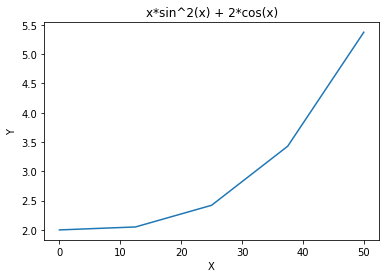

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   630.8220309474 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   712.3555773241 |        12.9249681173 |    81.5335463767 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   729.2153785730 |        15.5976397143 |    98.3933476256 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   552.8254222841 |        12.36

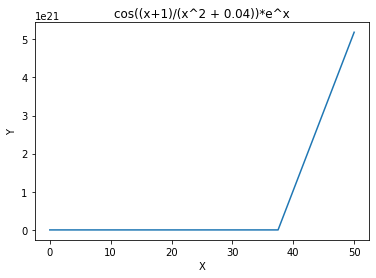

+-----------------------+------------------------------------+----------------------+------------------------------------+
| Integration method    |     Value of the definite integral |   Relative error [%] |                     Absolute error |
+=======================+====================================+======================+====================================+
| Quad integral (SciPy) |  5183579838001816010752.0000000000 |         0.0000000000 |                       0.0000000000 |
+-----------------------+------------------------------------+----------------------+------------------------------------+
| Rectangular rule      |     2353186737859123712.0000000000 |        99.9546030579 |  5181226651263956942848.0000000000 |
+-----------------------+------------------------------------+----------------------+------------------------------------+
| Trapezoidal rule      | 25920487021705672261632.0000000000 |       400.0499236392 | 20736907183703858348032.0000000000 |
+---------------

In [74]:
integral_comparison(0, 50, 5)

## Przedział [0, 50], 10 kroków

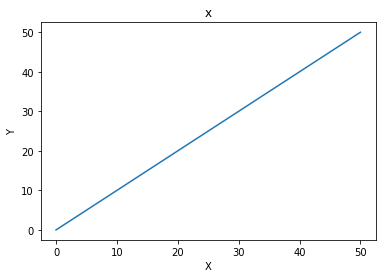

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  1125.0000000000 |        10.0000000000 |   125.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  1250.0000000000 |         0.00

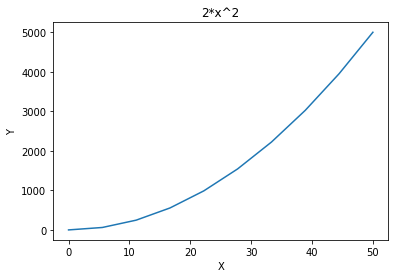

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 83333.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 71250.0000000000 |        14.5000000000 | 12083.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 83750.0000000000 |         0.5000000000 |   416.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 83333.3333333333 |         0.00

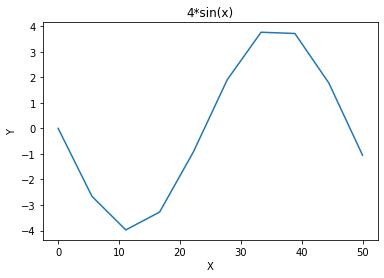

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     0.1401358860 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     2.1547669332 |      1437.6267951049 |     2.0146310471 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                    -0.4689816039 |       434.6620320761 |     0.6091174899 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                    -0.5562187968 |       496.91

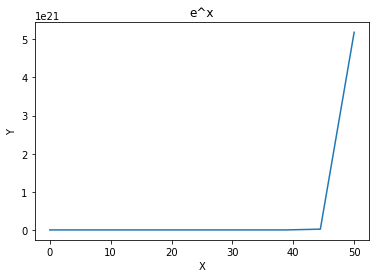

+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Integration method    |     Value of the definite integral |   Relative error [%] |                    Absolute error |
+=======================+====================================+======================+===================================+
| Quad integral (SciPy) |  5184705528587072045056.0000000000 |         0.0000000000 |                      0.0000000000 |
+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Rectangular rule      |   175856265483711840256.0000000000 |        96.6081725468 | 5008849263103360106496.0000000000 |
+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Trapezoidal rule      | 13137620086951392575488.0000000000 |       153.3918274532 | 7952914558364320530432.0000000000 |
+-----------------------

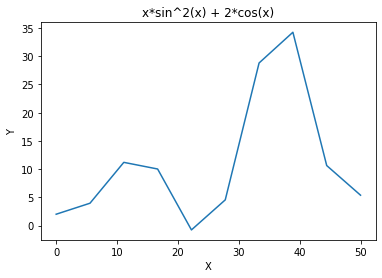

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   630.8220309474 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   609.4322968504 |         3.3907715723 |    21.3897340971 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   617.8621974749 |         2.0544357738 |    12.9598334726 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   580.7444704421 |         7.93

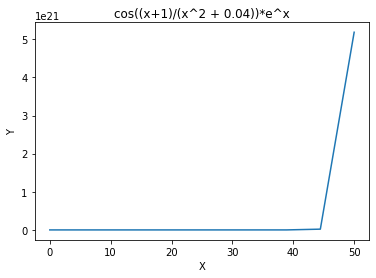

+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Integration method    |     Value of the definite integral |   Relative error [%] |                    Absolute error |
+=======================+====================================+======================+===================================+
| Quad integral (SciPy) |  5183579838001816010752.0000000000 |         0.0000000000 |                      0.0000000000 |
+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Rectangular rule      |   175810812517309874176.0000000000 |        96.6083128260 | 5007769025484506005504.0000000000 |
+-----------------------+------------------------------------+----------------------+-----------------------------------+
| Trapezoidal rule      | 13134877730001213456384.0000000000 |       153.3939505225 | 7951297891999397445632.0000000000 |
+-----------------------

In [75]:
integral_comparison(0, 50, 10)

## Przedział [0, 50], 50 kroków

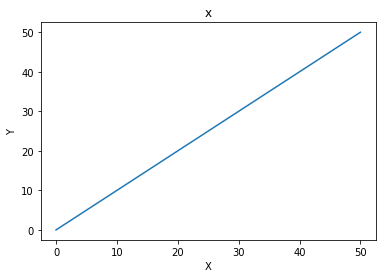

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  1225.0000000000 |         2.0000000000 |    25.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  1250.0000000000 |         0.00

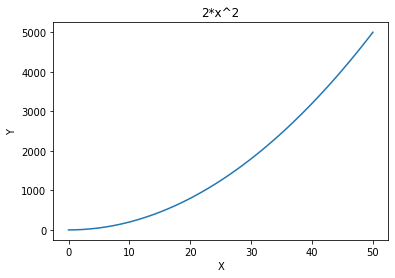

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 83333.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 80850.0000000000 |         2.9800000000 |  2483.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 83350.0000000000 |         0.0200000000 |    16.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 83333.3333333333 |         0.00

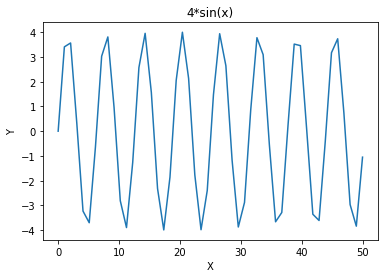

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     0.1401358860 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.6530082168 |       365.9821515218 |     0.5128723308 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     0.1282585094 |         8.4756139144 |     0.0118773767 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     0.1410179400 |         0.62

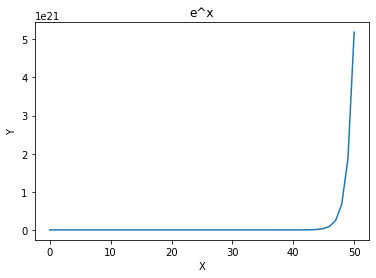

+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Integration method    |    Value of the definite integral |   Relative error [%] |                    Absolute error |
+=======================+===================================+======================+===================================+
| Quad integral (SciPy) | 5184705528587072045056.0000000000 |         0.0000000000 |                      0.0000000000 |
+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Rectangular rule      | 3017377849614294581248.0000000000 |        41.8023293131 | 2167327678972777463808.0000000000 |
+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Trapezoidal rule      | 5609730613907831128064.0000000000 |         8.1976706869 |  425025085320759083008.0000000000 |
+-----------------------+-------

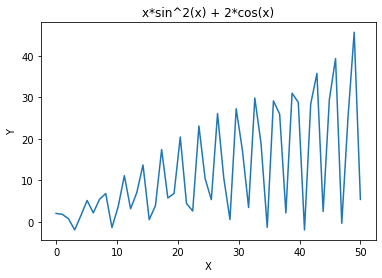

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   630.8220309474 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   626.9222220042 |         0.6182106445 |     3.8998089433 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   628.6082021291 |         0.3509434848 |     2.2138288184 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   631.8266795672 |         0.15

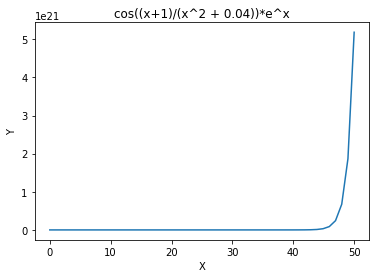

+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Integration method    |    Value of the definite integral |   Relative error [%] |                    Absolute error |
+=======================+===================================+======================+===================================+
| Quad integral (SciPy) | 5183579838001816010752.0000000000 |         0.0000000000 |                      0.0000000000 |
+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Rectangular rule      | 3016706606484828454912.0000000000 |        41.8026402455 | 2166873231516987555840.0000000000 |
+-----------------------+-----------------------------------+----------------------+-----------------------------------+
| Trapezoidal rule      | 5608519989981609984000.0000000000 |         8.1978124242 |  424940151979793973248.0000000000 |
+-----------------------+-------

In [76]:
integral_comparison(0, 50, 50)

## Przedział [0, 50], 1000 kroków

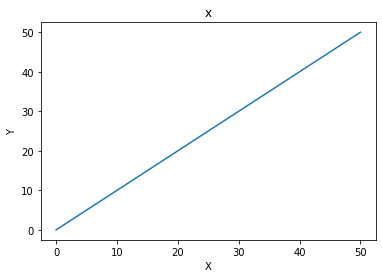

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                  1248.7500000000 |         0.1000000000 |     1.2500000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                  1250.0000000000 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                  1250.0000000000 |         0.00

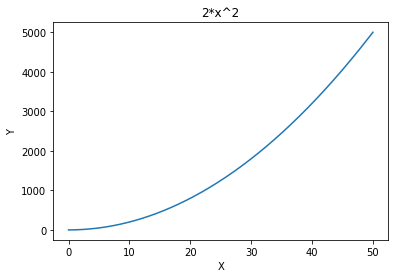

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 83333.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 83208.3750000000 |         0.1499500000 |   124.9583333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 83333.3750000000 |         0.0000500000 |     0.0416666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 83333.3333333344 |         0.00

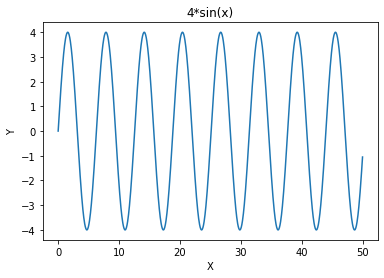

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                     0.1401358860 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                     0.1663441752 |        18.7020540704 |     0.0262082892 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                     0.1401066898 |         0.0208342014 |     0.0000291962 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                     0.1401358909 |         0.00

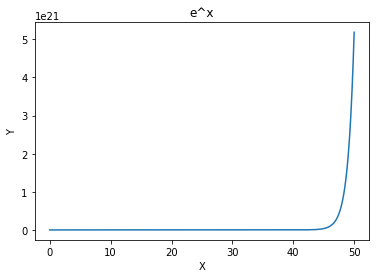

+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Integration method    |    Value of the definite integral |   Relative error [%] |                   Absolute error |
+=======================+===================================+======================+==================================+
| Quad integral (SciPy) | 5184705528587072045056.0000000000 |         0.0000000000 |                     0.0000000000 |
+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Rectangular rule      | 5056167992354087632896.0000000000 |         2.4791675347 | 128537536232984412160.0000000000 |
+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Trapezoidal rule      | 5185785630568763883520.0000000000 |         0.0208324653 |   1080101981691838464.0000000000 |
+-----------------------+---------------

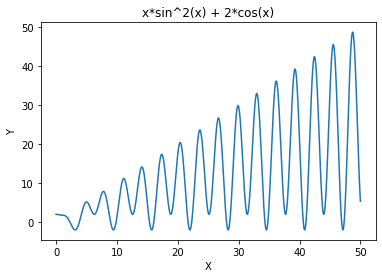

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   630.8220309474 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   630.7325800961 |         0.0141800455 |     0.0894508513 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   630.8168791024 |         0.0008166876 |     0.0051518450 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   630.8220344211 |         0.00

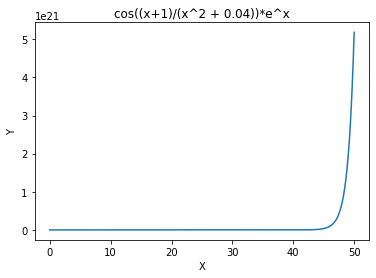

+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Integration method    |    Value of the definite integral |   Relative error [%] |                   Absolute error |
+=======================+===================================+======================+==================================+
| Quad integral (SciPy) | 5183579838001816010752.0000000000 |         0.0000000000 |                     0.0000000000 |
+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Rectangular rule      | 5055069055240298823680.0000000000 |         2.4791898028 | 128510782761517187072.0000000000 |
+-----------------------+-----------------------------------+----------------------+----------------------------------+
| Trapezoidal rule      | 5184659724415137742848.0000000000 |         0.0208328307 |   1079886413321732096.0000000000 |
+-----------------------+---------------

In [77]:
integral_comparison(0, 50, 1000)

## Wnioski

Spośród trzech badanych metod całkowania w ogólności najlepsze efekty daje metoda Simpsona, następnie metoda trapezów a na końcu metoda prostokątów. Kiedy jednak pochylimy się nad poszczególnymi wykresami zauważymy, że każda z 3 metod radzi sobie lepiej od pozostałych w określonych okolicznościach (funckja, przedział, liczba kroków). Przykładowo, dla powyższych wielomianów, dla małej liczby kroków (5, w porywach do 10) najmniejszy błąd daje metoda trapezów. Z kolei metoda prostokątów dla 5 kroków dawała najlepsze rezultaty dla funkcji 4*sin(x) oraz e^x (na dużych przedziałach, gdzie e^x osiąga znaczne wartości). Przych większych liczbach kroków niewątpliwie najlepiej radzi sobie metoda Simpsona.